In [8]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *
import math as math

import numpy as np
import matplotlib.pyplot as ply
import scipy, pylab

In [9]:
m = UNITS.meter
s = UNITS.second
kg = UNITS.kilogram
AU = UNITS.astronomical_unit
N = UNITS.newton

<Unit('newton')>

In [11]:
#asteroid is starting approximately "r" away in the x and y distance
px_0 = 300000 * m
py_0 = 300000 * m
vx_0 = 0 * m/s
vy_0 = -1000 * m/ s
init = State(px=px_0,
             py=py_0,
             vx=vx_0,
             vy=vy_0)

,values
px,300000 meter
py,300000 meter
vx,0.0 meter / second
vy,-1000.0 meter / second


In [12]:
def make_system(px_0, py_0, vx_0, vy_0):
    
    init = State(px=px_0 * m,
         py=py_0 * m,
         vx=vx_0 * m/s,
         vy=vy_0 * m/s)
    
        #universal gravitation value
    G = 6.67408e-11*N/(kg**2 * m**2)
    
         #mass of asteroid that killed dinosaurs
    m1 = 6.1e15* kg
    
        #earth mass
    m2 = 5.972324e24* kg
    
        #intial and final time (0s and 1 year in seconds)
    t_0 = 0 * s
    t_end = 315360000 * s
    
        #radius of earth plus radius of asteroid that killed the dinosaurs
    r_final = 6376000 * m

    print(init)
    return System(init=init, G=G, m1=m1, m2=m2, t_0=t_0, t_end=t_end, r_final=r_final)

In [13]:
    #asteroid is starting approximately "r" away in the x and y distance
system = make_system(300000, 300000, 0, -1000)

px              300000 meter
py              300000 meter
vx        0.0 meter / second
vy    -1000.0 meter / second
dtype: object


,values
init,px 300000 meter py 3...
G,6.67408e-11 newton / kilogram ** 2 / meter ** 2
m1,6100000000000000.0 kilogram
m2,5.972324e+24 kilogram
t_0,0 second
t_end,315360000 second
r_final,6376000 meter


In [14]:
def universal_gravitation(state, system):
    px, py, vx, vy = state
    unpack(system)
    

    position = Vector(px, py)
    P = sqrt(px**2/m**2 + py**2/m**2)
    F_magnitude = G * m1 * m2/ ((P)**2)
    
    P_direction = position/P
    
    F = P_direction * (-1) * F_magnitude * m

    
    return F

In [15]:
universal_gravitation(init, system)

<Quantity([-9.55162141e+18 -9.55162141e+18], 'newton')>

In [16]:
def event_func(state, t, system):

    px, py, vx, vy = state
    
    P = abs(sqrt(px**2 + py**2))
    
    return P - abs(system.r_final - 1)

In [17]:
universal_gravitation(init, system)

<Quantity([-9.55162141e+18 -9.55162141e+18], 'newton')>

In [18]:
def slope_func(state, t, system):
    px, py, vx, vy = state
    unpack(system)
    
    position = Vector(px, py)
    
    F = universal_gravitation(state, system)
    
    Fx = F.x
    Fy = F.y
    
    dpxdt = vx
    
    dpydt = vy
    
    dvxdt = Fx/m1
    
    dvydt = Fy/m1
    
    
    return dpxdt, dpydt, dvxdt, dvydt

In [19]:
slope_func(init, 0, system)

(<Quantity(0.0, 'meter / second')>,
 <Quantity(-1000.0, 'meter / second')>,
 <Quantity(-1565.839575767627, 'newton / kilogram')>,
 <Quantity(-1565.839575767627, 'newton / kilogram')>)

In [20]:
grav = universal_gravitation(init, system)

<Quantity([-9.55162141e+18 -9.55162141e+18], 'newton')>

In [21]:
results, details = run_ode_solver(system, slope_func, vectorized = True, events = event_func)
results.px/=1e9
results.py/=1e9
details
print(details.message)
print(details)
print(results.last)

Required step size is less than spacing between numbers.
sol                                                      None
t_events                                                 [[]]
nfev                                                    23444
njev                                                        0
nlu                                                         0
status                                                     -1
message     Required step size is less than spacing betwee...
success                                                 False
dtype: object
<bound method NDFrame.last of                      px            py            vx            vy
0.000000   3.000000e-04  3.000000e-04  0.000000e+00 -1.000000e+03
0.000001   3.000000e-04  3.000000e-04 -1.732050e-03 -1.000002e+03
0.000012   3.000000e-04  3.000000e-04 -1.905255e-02 -1.000019e+03
0.000123   3.000000e-04  2.999999e-04 -1.922576e-01 -1.000192e+03
0.001229   3.000000e-04  2.999988e-04 -1.924314e+00 -1.001924e+03
0.01229

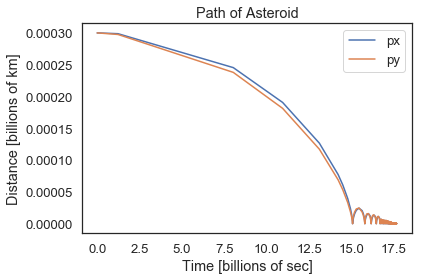

In [22]:
results.px.plot()
results.py.plot()
decorate(ylabel='Distance [billions of km]',
        xlabel='Time [billions of sec]',
         title='Path of Asteroid')

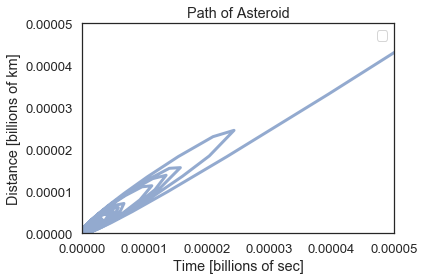

In [23]:
axes = plt.gca()
axes.set_xlim([0, 0.00005])
axes.set_ylim([0, 0.00005])

plot(results.px,results.py)
decorate(xlabel='Distance [billions of km]', 
         ylabel='Distance [billions of km]',
         title='Path of Asteroid')

In [24]:
def collision_result(results):
    colvalx = get_last_value(results.px)
    colvaly = get_last_value(results.py)
    print('Final X Value =', colvalx)
    print('Final Y Value =', colvaly)

    if -1 < colvalx and colvaly < 1:
        print ('Kaboom! The asteroid hit!')
    else:
        print ('We live to love another day!')

In [25]:
collision_result(results)

Final X Value = 2.401860681452048e-14
Final Y Value = -7.774799575110358e-14
Kaboom! The asteroid hit!


px              300000 meter
py              300000 meter
vx        0.0 meter / second
vy    -1000.0 meter / second
dtype: object
Final X Value = 2.401860681452048e-05
Final Y Value = -7.774799575110359e-05
Kaboom! The asteroid hit!
px              300000 meter
py              300000 meter
vx        0.0 meter / second
vy    -3250.0 meter / second
dtype: object
Final X Value = -0.00019528327106418505
Final Y Value = -5.689207691431667e-05
Kaboom! The asteroid hit!
px              300000 meter
py              300000 meter
vx        0.0 meter / second
vy    -5500.0 meter / second
dtype: object
Final X Value = -0.00022003510963148853
Final Y Value = 0.0002437331262958202
Kaboom! The asteroid hit!
px              300000 meter
py              300000 meter
vx        0.0 meter / second
vy    -7750.0 meter / second
dtype: object
Final X Value = -0.00042688559468384346
Final Y Value = 0.00029666007725250536
Kaboom! The asteroid hit!
px               300000 meter
py               300000 meter
vx 

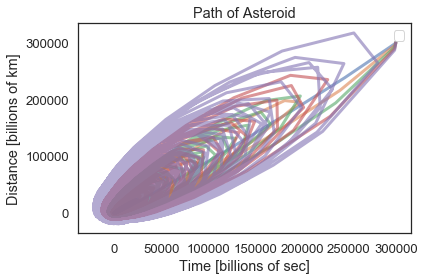

In [26]:
    vel_array = linspace(1000, 10000, 5)  
for sweep_vel in vel_array:
        system = make_system(300000, 300000, 0, -1*sweep_vel)
        results, details = run_ode_solver(system, slope_func, vectorized = True, events = event_func)
        collision_result(results)
        plot(results.px,results.py)
        decorate(xlabel='Distance [billions of km]', 
         ylabel='Distance [billions of km]',
         title='Path of Asteroid')

px               300000 meter
py               300000 meter
vx         0.0 meter / second
vy    -10000.0 meter / second
dtype: object
Final X Value = 0.0004212912287762479
Final Y Value = 0.00029198178720398925
Kaboom! The asteroid hit!
px               300000 meter
py               300000 meter
vx         0.0 meter / second
vy    -32500.0 meter / second
dtype: object
Final X Value = -0.0020671600763026167
Final Y Value = 0.0002242539025830517
Kaboom! The asteroid hit!
px               300000 meter
py               300000 meter
vx         0.0 meter / second
vy    -55000.0 meter / second
dtype: object
Final X Value = -5245427.631310573
Final Y Value = -3624755.4693640424
We live to love another day!
px               300000 meter
py               300000 meter
vx         0.0 meter / second
vy    -77500.0 meter / second
dtype: object
Final X Value = -2409022.702405719
Final Y Value = -5903386.559195902
We live to love another day!
px                300000 meter
py                300000 met

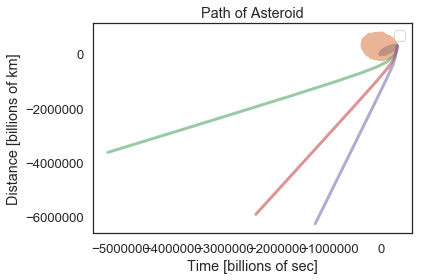

In [27]:
    vel_array2 = linspace(10000, 100000, 5)  
for sweep_vel in vel_array2:
        system = make_system(300000, 300000, 0, -1*sweep_vel)
        results, details = run_ode_solver(system, slope_func, vectorized = True, events = event_func)
        collision_result(results)
        plot(results.px,results.py)
        decorate(xlabel='Distance [billions of km]', 
         ylabel='Distance [billions of km]',
         title='Path of Asteroid')

px               300000 meter
py               300000 meter
vx         0.0 meter / second
vy    -38125.0 meter / second
dtype: object
Final X Value = -0.0017428050717388979
Final Y Value = 0.002938641321146782
Kaboom! The asteroid hit!
px               300000 meter
py               300000 meter
vx         0.0 meter / second
vy    -38750.0 meter / second
dtype: object
Final X Value = -0.0023891581621569066
Final Y Value = 0.0022881165665098856
Kaboom! The asteroid hit!
px               300000 meter
py               300000 meter
vx         0.0 meter / second
vy    -39375.0 meter / second
dtype: object
Final X Value = -0.005075074219659456
Final Y Value = -0.0015658591296571212
Kaboom! The asteroid hit!
px               300000 meter
py               300000 meter
vx         0.0 meter / second
vy    -40000.0 meter / second
dtype: object
Final X Value = -0.004776828468161679
Final Y Value = -0.0024901375566320073
Kaboom! The asteroid hit!
px               300000 meter
py               300000

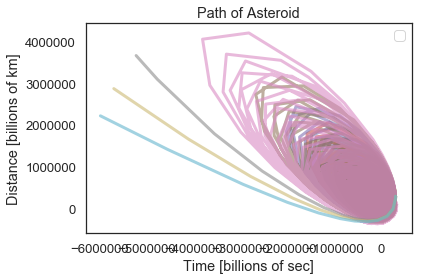

In [29]:
#CAN DELETE, JUST NOTE THAT WE JUMPED TO CLOSER RANGE
    vel_array3 = linspace(38125, 43750, 10)  
for sweep_vel in vel_array3:
        system = make_system(300000, 300000, 0, -1*sweep_vel)
        results, details = run_ode_solver(system, slope_func, vectorized = True, events = event_func)
        collision_result(results)
        plot(results.px,results.py)
        decorate(xlabel='Distance [billions of km]', 
         ylabel='Distance [billions of km]',
         title='Path of Asteroid')

px               300000 meter
py               300000 meter
vx         0.0 meter / second
vy    -42083.0 meter / second
dtype: object
Final X Value = -0.005971722393688606
Final Y Value = 0.006109688285641839
Kaboom! The asteroid hit!
px                          300000 meter
py                          300000 meter
vx                    0.0 meter / second
vy    -42090.666666666664 meter / second
dtype: object
Final X Value = 0.00587532360500044
Final Y Value = -0.012262102623406948
Kaboom! The asteroid hit!
px                          300000 meter
py                          300000 meter
vx                    0.0 meter / second
vy    -42098.333333333336 meter / second
dtype: object
Final X Value = 0.011949571677247443
Final Y Value = 0.007136124368947902
Kaboom! The asteroid hit!
px               300000 meter
py               300000 meter
vx         0.0 meter / second
vy    -42106.0 meter / second
dtype: object
Final X Value = -4566115.382494392
Final Y Value = 4450163.318547882
We liv

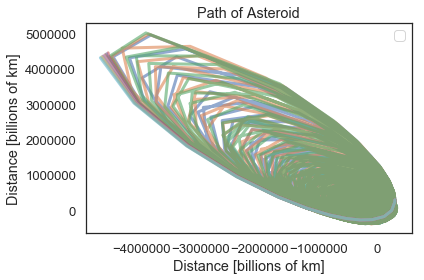

In [31]:
#rempved intermediate sweeps, jumped to more narrowed range
    vel_array4 = linspace(42083.0, 42152, 10)  
for sweep_vel in vel_array4:
        system = make_system(300000, 300000, 0, -1*sweep_vel)
        results, details = run_ode_solver(system, slope_func, vectorized = True, events = event_func)
        collision_result(results)
        plot(results.px,results.py)
        decorate(xlabel='Distance [billions of km]', 
         ylabel='Distance [billions of km]',
         title='Path of Asteroid')

px               300000 meter
py               300000 meter
vx         0.0 meter / second
vy    -42098.0 meter / second
dtype: object
Final X Value = -0.010037090056138108
Final Y Value = -0.009028403359159429
Kaboom! The asteroid hit!
px               300000 meter
py               300000 meter
vx         0.0 meter / second
vy    -42099.0 meter / second
dtype: object
Final X Value = -0.005490367335749029
Final Y Value = 0.012047648068709477
Kaboom! The asteroid hit!
px               300000 meter
py               300000 meter
vx         0.0 meter / second
vy    -42100.0 meter / second
dtype: object
Final X Value = -4544786.852473755
Final Y Value = 4471943.169762189
We live to love another day!
px               300000 meter
py               300000 meter
vx         0.0 meter / second
vy    -42101.0 meter / second
dtype: object
Final X Value = -4548444.578457363
Final Y Value = 4468222.819500256
We live to love another day!
px               300000 meter
py               300000 meter
vx   

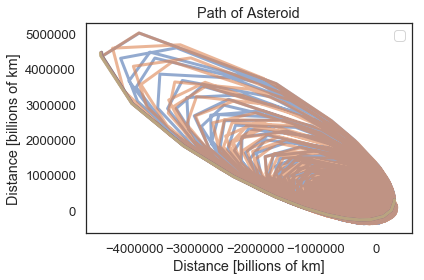

In [33]:
    vel_array5 = linspace(42098.0, 42106, 9)  
for sweep_vel in vel_array5:
        system = make_system(300000, 300000, 0, -1*sweep_vel)
        results, details = run_ode_solver(system, slope_func, vectorized = True, events = event_func)
        collision_result(results)
        plot(results.px,results.py)
        decorate(xlabel='Distance [billions of km]', 
         ylabel='Distance [billions of km]',
         title='Path of Asteroid')